In [1]:
import numpy as np
import pandas as pd
# for graph
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [3]:
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
# load data
x = wine.data
y = wine.target

In [9]:
x.shape , y.shape

((178, 13), (178,))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, stratify = y)

# KNN for K = 3

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
print('accuracy: ', metrics.accuracy_score(y_test, y_predict))

accuracy:  0.6481481481481481


# KNN for K = 5

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
print('accuracy: ', metrics.accuracy_score(y_test, y_predict))

accuracy:  0.7222222222222222


# KNN for K = 7

In [13]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
print('accuracy: ', metrics.accuracy_score(y_test, y_predict))

accuracy:  0.6851851851851852


# How to imrove KNN

# # Standardization of datasets

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0, stratify = y)

In [16]:
# for K = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
print('accuracy: ', metrics.accuracy_score(y_test, y_predict))

accuracy:  0.9814814814814815


In [17]:
# for K = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
print('accuracy: ', metrics.accuracy_score(y_test, y_predict))

accuracy:  0.9629629629629629


In [18]:
# for K = 7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)
print('accuracy: ', metrics.accuracy_score(y_test, y_predict))

accuracy:  0.9629629629629629


# Cross Validation

In [19]:
neighbours = list(range(1, 50, 2))
cv_scores = []

for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_scaled, y, cv = 5)
    cv_scores.append(scores.mean())
cv_scores

[0.9496202084437378,
 0.9442148030383326,
 0.9550256138491433,
 0.9667903197314962,
 0.9501150730562495,
 0.9553524112347642,
 0.9555025613849143,
 0.9609079667903198,
 0.9667903197314962,
 0.9607578166401696,
 0.9607578166401696,
 0.9607578166401696,
 0.966163222045575,
 0.966163222045575,
 0.966163222045575,
 0.966163222045575,
 0.966163222045575,
 0.966163222045575,
 0.966163222045575,
 0.966163222045575,
 0.966163222045575,
 0.966163222045575,
 0.9606076664900195,
 0.966163222045575,
 0.9607578166401696]

In [20]:
# calculating mean square error
mse = [1-x for x in cv_scores]
mse

[0.050379791556262155,
 0.055785196961667394,
 0.04497438615085669,
 0.033209680268503794,
 0.04988492694375046,
 0.04464758876523578,
 0.044497438615085705,
 0.039092033209680244,
 0.033209680268503794,
 0.03924218335983043,
 0.03924218335983043,
 0.03924218335983043,
 0.03383677795442497,
 0.03383677795442497,
 0.03383677795442497,
 0.03383677795442497,
 0.03383677795442497,
 0.03383677795442497,
 0.03383677795442497,
 0.03383677795442497,
 0.03383677795442497,
 0.03383677795442497,
 0.039392333509980504,
 0.03383677795442497,
 0.03924218335983043]

In [21]:
optimal_k = neighbours[mse.index(min(mse))]
optimal_k

7

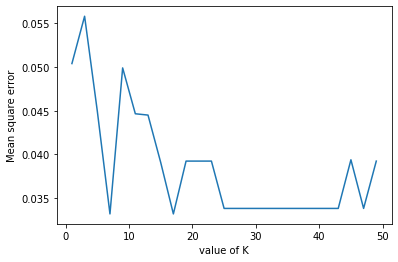

In [22]:
plt.plot(neighbours, mse)
plt.xlabel('value of K')
plt.ylabel('Mean square error')
plt.show()